768
768
GPU is available
4
Number of inputs is 768


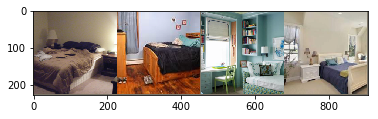

In [2]:
%matplotlib inline
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torchsample
from torchsample import transforms as ts_transforms
import matplotlib.pyplot as plt
import time
import copy
import os
from PIL import Image

from torchsample.transforms import RangeNorm

import functions.fine_tune as ft

plt.ion()   # interactive mode
data_transforms =transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        #ts_transforms.RandomRotate(30)
    ])


data_dir = '..//Data_Sets//pruned//good//train'
dsets = datasets.ImageFolder_mtezcan([data_dir], data_transforms)

dset_loaders = torch.utils.data.DataLoader(dsets, batch_size=4,shuffle=False, num_workers=16)
use_gpu = torch.cuda.is_available()

#use_gpu=False
if use_gpu:
    print('GPU is available')
else:
    print('!!!!! NO CUDA GPUS DETECTED')
    
inputs, classes = next(iter(dset_loaders))
print(len(inputs))
# Make a grid from batch
print('Number of inputs is '+str(len(dsets)))

out = torchvision.utils.make_grid(inputs,nrow=4)
ft.imshow(out)